In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
from qiskit_aer import Aer
from qiskit import transpile, QuantumCircuit


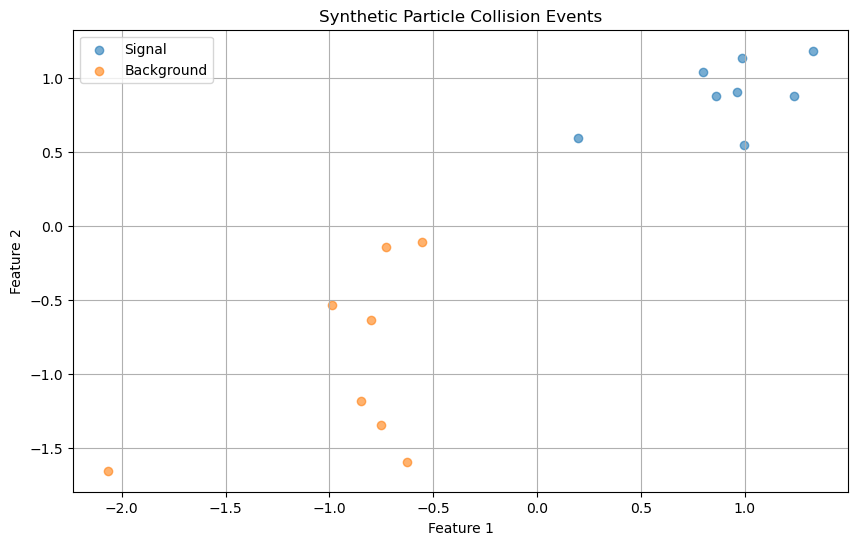

Quantum Model Accuracy: 50.00%
Classical SVM Accuracy: 100.00%


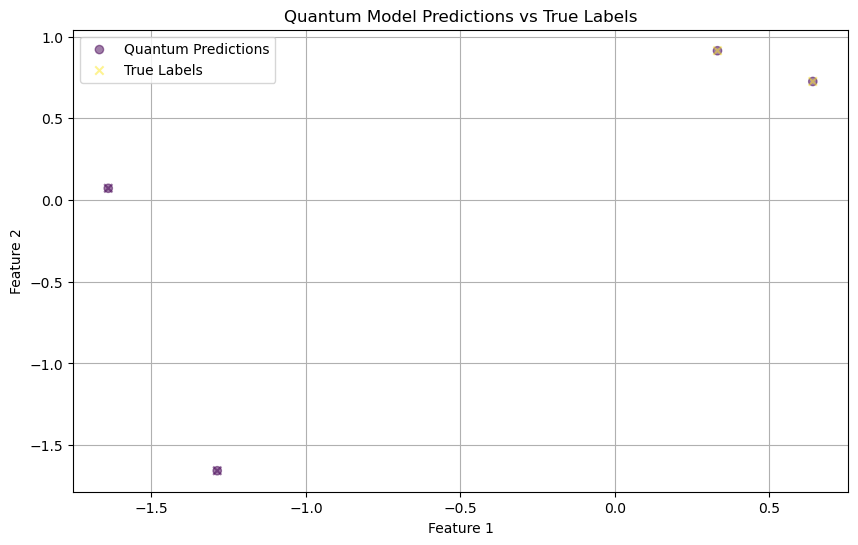

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
from qiskit_aer import Aer
from qiskit import transpile, QuantumCircuit

# Seed for reproducibility
np.random.seed(42)

# Function to generate synthetic particle collision data
def generate_synthetic_data(num_samples=20):
    # Generate signal events (Higgs-like)
    signal_data = np.random.multivariate_normal(mean=[1.0, 1.0], cov=[[0.1, 0.05], [0.05, 0.1]], size=num_samples // 2)
    signal_labels = np.ones(num_samples // 2)  # Label 1 for signal

    # Generate background events (random collisions)
    background_data = np.random.multivariate_normal(mean=[-1.0, -1.0], cov=[[0.5, 0.2], [0.2, 0.5]], size=num_samples // 2)
    background_labels = np.zeros(num_samples // 2)  # Label 0 for background

    # Combine data and labels
    data = np.vstack((signal_data, background_data))
    labels = np.concatenate((signal_labels, background_labels))

    return data, labels

# Generate synthetic data
X, y = generate_synthetic_data(20)

# Split the dataset into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the data
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Visualize the synthetic data
plt.figure(figsize=(10, 6))
plt.scatter(X_train[y_train == 1][:, 0], X_train[y_train == 1][:, 1], label='Signal', alpha=0.6)
plt.scatter(X_train[y_train == 0][:, 0], X_train[y_train == 0][:, 1], label='Background', alpha=0.6)
plt.title('Synthetic Particle Collision Events')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.legend()
plt.grid()
plt.show()

# Enhanced Custom Quantum Kernel function
def custom_quantum_kernel(x1, x2):
    """Enhanced Custom Quantum Kernel based on overlap of quantum states."""
    # Create a quantum circuit with 2 qubits
    circuit = QuantumCircuit(2)
    
    # Apply rotation based on input data
    circuit.ry(x1[0], 0)
    circuit.ry(x1[1], 1)
    
    # Introduce a new rotation based on x2
    circuit.ry(x2[0], 0)
    circuit.ry(x2[1], 1)
    
    # Add entangling gates
    circuit.cx(0, 1)
    circuit.h(1)  # Hadamard gate on qubit 1 for more superposition
    
    # Measure the circuit
    circuit.measure_all()

    # Simulate the quantum circuit
    backend = Aer.get_backend('aer_simulator')
    transpiled_circuit = transpile(circuit, backend)
    job = backend.run(transpiled_circuit)
    counts = job.result().get_counts()

    # Use the probability of measuring |00> as the kernel value
    return counts.get('00', 0) / sum(counts.values()) if counts else 0

# Custom QSVC class that utilizes the quantum kernel
class CustomQSVC:
    def __init__(self):
        self.X_train = None
        self.y_train = None

    def fit(self, X, y):
        self.X_train = X
        self.y_train = y

    def predict(self, X):
        return np.array([self._predict_single(x) for x in X])

    def _predict_single(self, x):
        # Calculate the kernel values with the training data
        kernel_values = np.array([custom_quantum_kernel(x, x_train) for x_train in self.X_train])
        # Implement a simple linear SVM decision rule
        return 1 if np.sum(kernel_values[self.y_train == 1]) > np.sum(kernel_values[self.y_train == 0]) else 0

# Fit the custom quantum classifier
custom_qsvc = CustomQSVC()
custom_qsvc.fit(X_train, y_train)

# Make predictions
y_pred_qsvc = custom_qsvc.predict(X_test)

# Calculate accuracy for custom QSVC
accuracy_qsvc = accuracy_score(y_test, y_pred_qsvc)
print(f"Quantum Model Accuracy: {accuracy_qsvc * 100:.2f}%")

# Train a classical SVC for comparison
classical_svc = SVC(kernel='rbf')
classical_svc.fit(X_train, y_train)
y_pred_classical = classical_svc.predict(X_test)

# Calculate accuracy for classical SVC
accuracy_classical = accuracy_score(y_test, y_pred_classical)
print(f"Classical SVM Accuracy: {accuracy_classical * 100:.2f}%")

# Visualizing the results
plt.figure(figsize=(10, 6))
plt.scatter(X_test[:, 0], X_test[:, 1], c=y_pred_qsvc, marker='o', label='Quantum Predictions', alpha=0.5)
plt.scatter(X_test[:, 0], X_test[:, 1], c=y_test, marker='x', label='True Labels', alpha=0.5)
plt.title("Quantum Model Predictions vs True Labels")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.legend()
plt.grid()
plt.show()


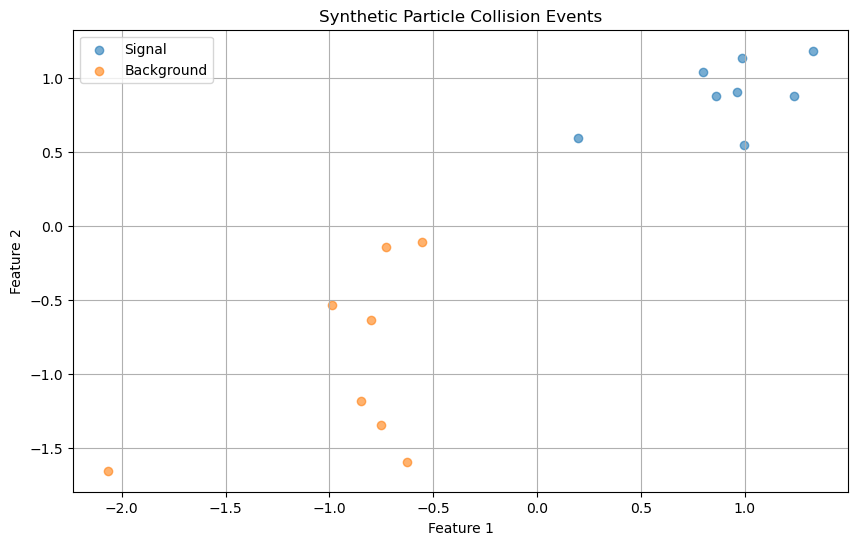

Quantum Model Accuracy: 50.00%
Classical SVM Accuracy: 100.00%


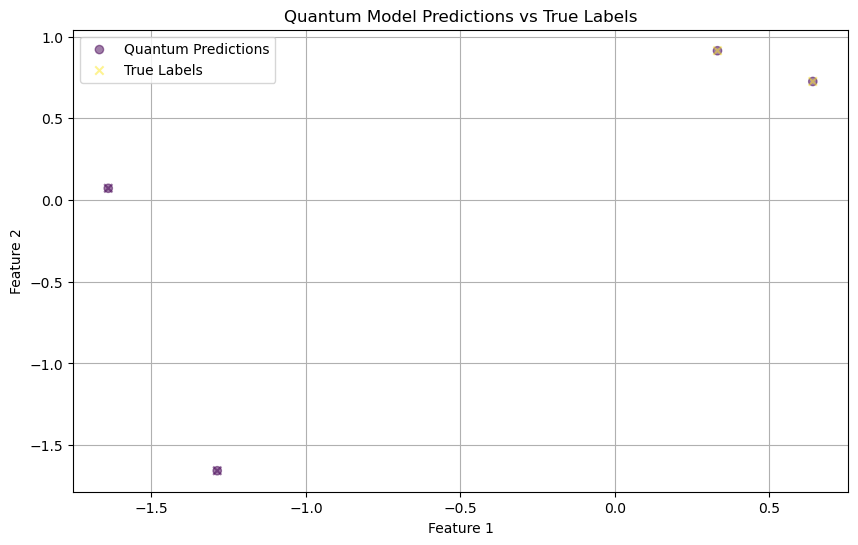

In [6]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
from qiskit_aer import Aer
from qiskit import transpile, QuantumCircuit

# Seed for reproducibility
np.random.seed(42)

# Function to generate synthetic particle collision data
def generate_synthetic_data(num_samples=20):
    # Generate signal events (Higgs-like)
    signal_data = np.random.multivariate_normal(mean=[1.0, 1.0], cov=[[0.1, 0.05], [0.05, 0.1]], size=num_samples // 2)
    signal_labels = np.ones(num_samples // 2)  # Label 1 for signal

    # Generate background events (random collisions)
    background_data = np.random.multivariate_normal(mean=[-1.0, -1.0], cov=[[0.5, 0.2], [0.2, 0.5]], size=num_samples // 2)
    background_labels = np.zeros(num_samples // 2)  # Label 0 for background

    # Combine data and labels
    data = np.vstack((signal_data, background_data))
    labels = np.concatenate((signal_labels, background_labels))

    return data, labels

# Generate synthetic data
X, y = generate_synthetic_data(20)

# Split the dataset into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the data
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Visualize the synthetic data
plt.figure(figsize=(10, 6))
plt.scatter(X_train[y_train == 1][:, 0], X_train[y_train == 1][:, 1], label='Signal', alpha=0.6)
plt.scatter(X_train[y_train == 0][:, 0], X_train[y_train == 0][:, 1], label='Background', alpha=0.6)
plt.title('Synthetic Particle Collision Events')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.legend()
plt.grid()
plt.show()

def custom_quantum_kernel(x1, x2):
    """Enhanced Custom Quantum Kernel based on overlap of quantum states."""
    # Create a quantum circuit with 16 qubits
    circuit = QuantumCircuit(16)
    
    # Encode x1 into the first four qubits (0 to 3)
    circuit.ry(x1[0], 0)
    circuit.ry(x1[1], 1)
    circuit.ry(x1[0], 2)  # Reuse x1 for additional qubits if needed
    circuit.ry(x1[1], 3)
    
    # Encode x2 into the next four qubits (4 to 7)
    circuit.ry(x2[0], 4)
    circuit.ry(x2[1], 5)
    circuit.ry(x2[0], 6)  # Reuse x2 for additional qubits if needed
    circuit.ry(x2[1], 7)

    # Apply entangling gates between the qubits
    circuit.cx(0, 1)
    circuit.cx(2, 3)
    circuit.cx(4, 5)
    circuit.cx(6, 7)

    # Introduce additional gates to create complexity
    circuit.h(0)
    circuit.h(4)
    circuit.t(1)
    circuit.t(5)
    
    # Add layers of entanglement and more rotations
    for _ in range(8):  # Increase the depth of the circuit
        # Entangling operations between qubits
        circuit.cx(1, 4)  # Connect qubits from x1 and x2
        circuit.cx(2, 5)
        circuit.cx(3, 6)
        circuit.cx(1, 6)

        # Apply rotations
        circuit.ry(np.pi / 4, 0)
        circuit.ry(np.pi / 4, 1)
        circuit.ry(np.pi / 4, 2)
        circuit.ry(np.pi / 4, 3)
        circuit.ry(np.pi / 4, 4)
        circuit.ry(np.pi / 4, 5)
        circuit.ry(np.pi / 4, 6)
        circuit.ry(np.pi / 4, 7)

    # Measure the circuit
    circuit.measure_all()

    # Simulate the quantum circuit
    backend = Aer.get_backend('aer_simulator')
    transpiled_circuit = transpile(circuit, backend)
    job = backend.run(transpiled_circuit)
    counts = job.result().get_counts()

    # Use the probability of measuring |00> as the kernel value
    return counts.get('00', 0) / sum(counts.values()) if counts else 0

# Custom QSVC class that utilizes the quantum kernel
class CustomQSVC:
    def __init__(self):
        self.X_train = None
        self.y_train = None

    def fit(self, X, y):
        self.X_train = X
        self.y_train = y

    def predict(self, X):
        return np.array([self._predict_single(x) for x in X])

    def _predict_single(self, x):
        # Calculate the kernel values with the training data
        kernel_values = np.array([custom_quantum_kernel(x, x_train) for x_train in self.X_train])
        # Implement a simple linear SVM decision rule
        return 1 if np.sum(kernel_values[self.y_train == 1]) > np.sum(kernel_values[self.y_train == 0]) else 0

# Fit the custom quantum classifier
custom_qsvc = CustomQSVC()
custom_qsvc.fit(X_train, y_train)

# Make predictions
y_pred_qsvc = custom_qsvc.predict(X_test)

# Calculate accuracy for custom QSVC
accuracy_qsvc = accuracy_score(y_test, y_pred_qsvc)
print(f"Quantum Model Accuracy: {accuracy_qsvc * 100:.2f}%")

# Train a classical SVC for comparison
classical_svc = SVC(kernel='rbf')
classical_svc.fit(X_train, y_train)
y_pred_classical = classical_svc.predict(X_test)

# Calculate accuracy for classical SVC
accuracy_classical = accuracy_score(y_test, y_pred_classical)
print(f"Classical SVM Accuracy: {accuracy_classical * 100:.2f}%")

# Visualizing the results
plt.figure(figsize=(10, 6))
plt.scatter(X_test[:, 0], X_test[:, 1], c=y_pred_qsvc, marker='o', label='Quantum Predictions', alpha=0.5)
plt.scatter(X_test[:, 0], X_test[:, 1], c=y_test, marker='x', label='True Labels', alpha=0.5)
plt.title("Quantum Model Predictions vs True Labels")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.legend()
plt.grid()
plt.show()


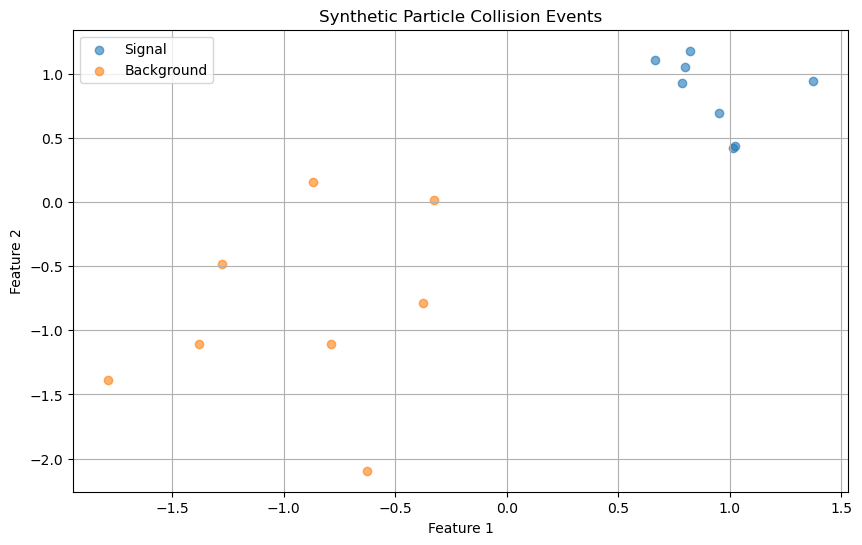

Quantum Model Accuracy: 25.00%
Classical SVM Accuracy: 100.00%


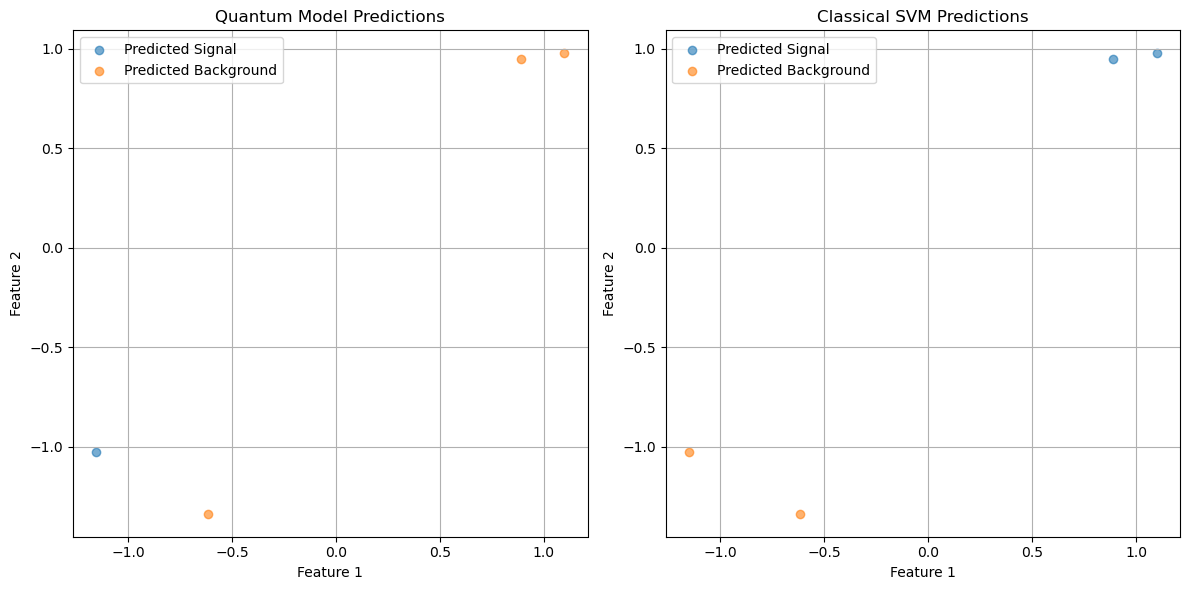

Quantum Model Accuracy: 75.00%
Classical SVM Accuracy: 100.00%


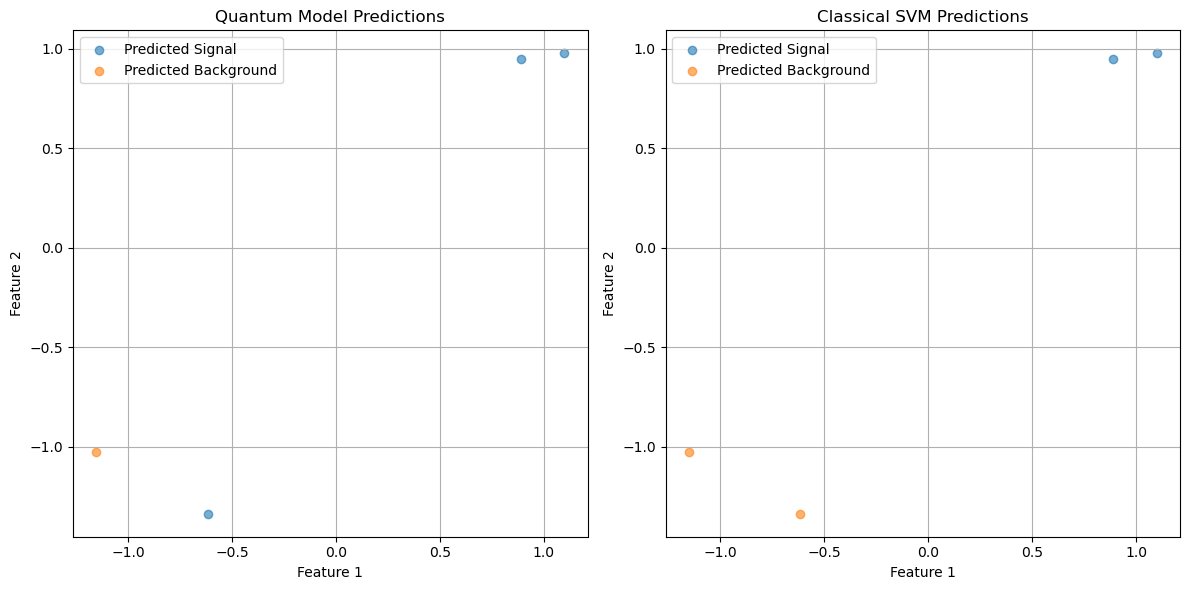

In [12]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
from qiskit.circuit.library import TwoLocal, ZFeatureMap
from qiskit_algorithms.optimizers import COBYLA
from qiskit_algorithms.utils import algorithm_globals
from qiskit_machine_learning.algorithms import VQC

# Seed for reproducibility
np.random.seed(42)

# Generate synthetic data
def generate_synthetic_data(num_samples=20):
    signal_data = np.random.multivariate_normal(mean=[1.0, 1.0, 1.0, 1.0], cov=np.eye(4) * 0.1, size=num_samples // 2)
    signal_labels = np.ones(num_samples // 2)
    background_data = np.random.multivariate_normal(mean=[-1.0, -1.0, -1.0, -1.0], cov=np.eye(4) * 0.5, size=num_samples // 2)
    background_labels = np.zeros(num_samples // 2)
    data = np.vstack((signal_data, background_data))
    labels = np.concatenate((signal_labels, background_labels))
    return data, labels

X, y = generate_synthetic_data(20)

# Split and standardize data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)
# Visualize the synthetic data
plt.figure(figsize=(10, 6))
plt.scatter(X_train[y_train == 1][:, 0], X_train[y_train == 1][:, 1], label='Signal', alpha=0.6)
plt.scatter(X_train[y_train == 0][:, 0], X_train[y_train == 0][:, 1], label='Background', alpha=0.6)
plt.title('Synthetic Particle Collision Events')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.legend()
plt.grid()
plt.show()

# Feature map and variational circuit
algorithm_globals.random_seed = 42
feature_map = ZFeatureMap(feature_dimension=4, reps=2)
ansatz = TwoLocal(num_qubits=4, rotation_blocks=['ry', 'rz', 'rx'], entanglement='full', reps=5)

# Create the VQC
vqc = VQC(feature_map=feature_map, ansatz=ansatz, optimizer=COBYLA(maxiter=100))
vqc.fit(X_train, y_train)

# Train classical SVM model
svm_model = SVC(kernel='rbf', probability=True)
svm_model.fit(X_train, y_train)

# Predictions and accuracy
y_pred_qml = vqc.predict(X_test)
y_pred_svm = svm_model.predict(X_test)

accuracy_qml = accuracy_score(y_test, y_pred_qml)
accuracy_svm = accuracy_score(y_test, y_pred_svm)

print(f"Quantum Model Accuracy: {accuracy_qml * 100:.2f}%")
print(f"Classical SVM Accuracy: {accuracy_svm * 100:.2f}%")

# Visualization
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.scatter(X_test[y_pred_qml == 1][:, 0], X_test[y_pred_qml == 1][:, 1], label='Predicted Signal', alpha=0.6)
plt.scatter(X_test[y_pred_qml == 0][:, 0], X_test[y_pred_qml == 0][:, 1], label='Predicted Background', alpha=0.6)
plt.title('Quantum Model Predictions')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.legend()
plt.grid()

plt.subplot(1, 2, 2)
plt.scatter(X_test[y_pred_svm == 1][:, 0], X_test[y_pred_svm == 1][:, 1], label='Predicted Signal', alpha=0.6)
plt.scatter(X_test[y_pred_svm == 0][:, 0], X_test[y_pred_svm == 0][:, 1], label='Predicted Background', alpha=0.6)
plt.title('Classical SVM Predictions')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.legend()
plt.grid()

plt.tight_layout()
plt.show()


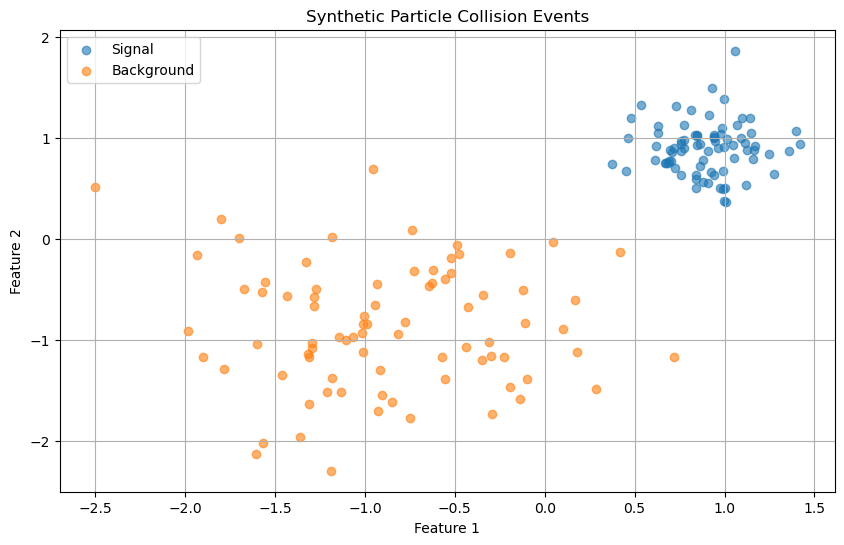

Quantum Model Accuracy: 55.00%
Classical SVM Accuracy: 100.00%


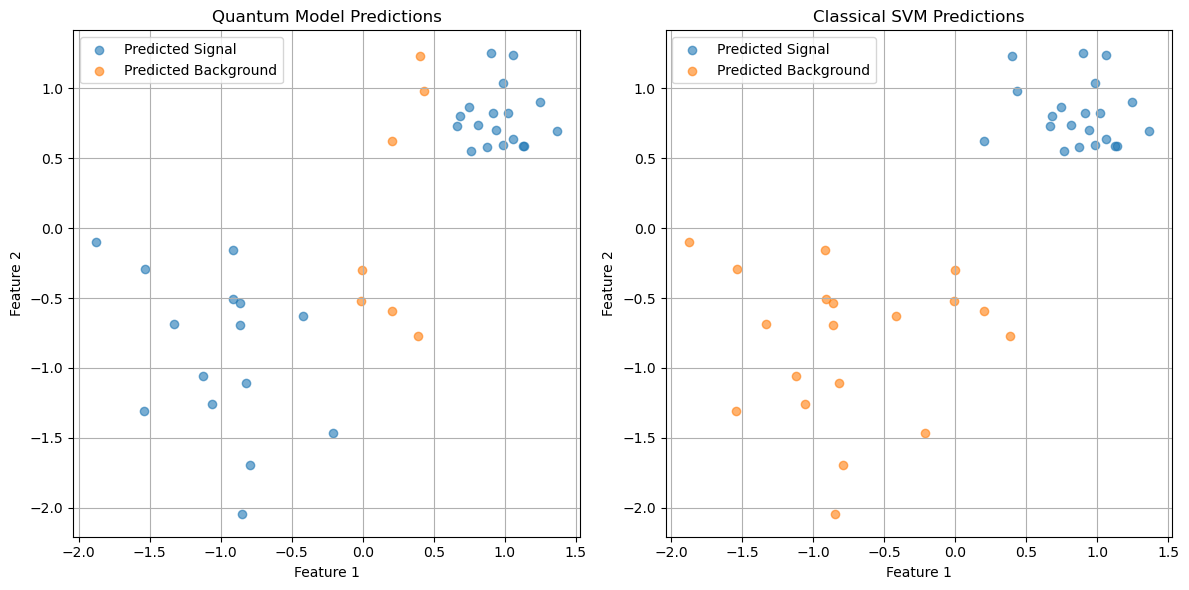

In [18]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
from qiskit.circuit.library import TwoLocal, ZFeatureMap
from qiskit_algorithms.optimizers import COBYLA
from qiskit_algorithms.utils import algorithm_globals
from qiskit_machine_learning.algorithms import VQC
# Seed for reproducibility
np.random.seed(42)

# Generate synthetic data for 16 dimensions
def generate_synthetic_data(num_samples=200):
    signal_data = np.random.multivariate_normal(mean=np.ones(8), cov=np.eye(8) * 0.1, size=num_samples // 2)
    signal_labels = np.ones(num_samples // 2)
    background_data = np.random.multivariate_normal(mean=-np.ones(8), cov=np.eye(8) * 0.5, size=num_samples // 2)
    background_labels = np.zeros(num_samples // 2)
    data = np.vstack((signal_data, background_data))
    labels = np.concatenate((signal_labels, background_labels))
    return data, labels

X, y = generate_synthetic_data(200)

# Split and standardize data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)
plt.figure(figsize=(10, 6))
plt.scatter(X_train[y_train == 1][:, 0], X_train[y_train == 1][:, 1], label='Signal', alpha=0.6)
plt.scatter(X_train[y_train == 0][:, 0], X_train[y_train == 0][:, 1], label='Background', alpha=0.6)
plt.title('Synthetic Particle Collision Events')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.legend()
plt.grid()
plt.show()

# Feature map and variational circuit
algorithm_globals.random_seed = 42
feature_map = ZFeatureMap(feature_dimension=8, reps=2)  # Feature map for 16 dimensions
ansatz = TwoLocal(num_qubits=8,                       # Adjusted for 16 qubits
                  rotation_blocks=['ry', 'rz', 'rx'], # Multiple rotation gates
                  entanglement='full',                # Full entanglement
                  reps=3,                             # Increased reps for depth
                  skip_unentangled_qubits=False,     # Keep all qubits entangled
                  parameter_prefix='vqc_')            # Parameter prefix

# Create the VQC
vqc = VQC(feature_map=feature_map, ansatz=ansatz, optimizer=COBYLA(maxiter=100))
vqc.fit(X_train, y_train)

# Train classical SVM model
svm_model = SVC(kernel='rbf', probability=True)
svm_model.fit(X_train, y_train)

# Predictions and accuracy
y_pred_qml = vqc.predict(X_test)
y_pred_svm = svm_model.predict(X_test)

accuracy_qml = accuracy_score(y_test, y_pred_qml)
accuracy_svm = accuracy_score(y_test, y_pred_svm)

print(f"Quantum Model Accuracy: {accuracy_qml * 100:.2f}%")
print(f"Classical SVM Accuracy: {accuracy_svm * 100:.2f}%")

# Visualization (optional)
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.scatter(X_test[y_pred_qml == 1][:, 0], X_test[y_pred_qml == 1][:, 1], label='Predicted Signal', alpha=0.6)
plt.scatter(X_test[y_pred_qml == 0][:, 0], X_test[y_pred_qml == 0][:, 1], label='Predicted Background', alpha=0.6)
plt.title('Quantum Model Predictions')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.legend()
plt.grid()

plt.subplot(1, 2, 2)
plt.scatter(X_test[y_pred_svm == 1][:, 0], X_test[y_pred_svm == 1][:, 1], label='Predicted Signal', alpha=0.6)
plt.scatter(X_test[y_pred_svm == 0][:, 0], X_test[y_pred_svm == 0][:, 1], label='Predicted Background', alpha=0.6)
plt.title('Classical SVM Predictions')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.legend()
plt.grid()

plt.tight_layout()
plt.show()
